In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

In [2]:
path_to_csv="C:/Users/82108/Downloads/mental-and-substance-use-as-share-of-disease.csv"

In [42]:
data=pd.read_csv(path_to_csv)
data.rename(columns={'DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)':'DALYs'}, inplace=True)
Countries=data['Entity'].unique()
Count_d=data['Code'].unique()
data

,Entity,Code,Year,DALYs
0,Afghanistan,AFG,1990,1.696670
1,Afghanistan,AFG,1991,1.734281
2,Afghanistan,AFG,1992,1.791189
3,Afghanistan,AFG,1993,1.776779
4,Afghanistan,AFG,1994,1.712986
...,...,...,...,...
6835,Zimbabwe,ZWE,2015,2.193166
6836,Zimbabwe,ZWE,2016,2.279813
6837,Zimbabwe,ZWE,2017,2.364265
6838,Zimbabwe,ZWE,2018,2.472949


In [34]:
Countries

array(['Afghanistan', 'African Region (WHO)', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Central African Republic', 'Chad',
       'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', 'Democratic Republic of Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'East Asia & Pacific (WB)',
       'Eastern Mediterranean Region (WHO)', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Eu

In [71]:
developed_countries=['United States','Germany','Japan','France','United Kingdom']
developing_countries=['Afghanistan','Sudan','Syria','Uganda','South Sudan']
middle_countries=['China','Russia','Poland','Chile','Malaysia']

In [72]:
developed_dat=data[data['Entity'].isin(developed_countries)]
middle_dat=data[data['Entity'].isin(middle_countries)]
developing_dat=data[data['Entity'].isin(developing_countries)]
developing_dat

,Entity,Code,Year,DALYs
0,Afghanistan,AFG,1990,1.696670
1,Afghanistan,AFG,1991,1.734281
2,Afghanistan,AFG,1992,1.791189
3,Afghanistan,AFG,1993,1.776779
4,Afghanistan,AFG,1994,1.712986
...,...,...,...,...
6235,Uganda,UGA,2015,3.236943
6236,Uganda,UGA,2016,3.272502
6237,Uganda,UGA,2017,3.548767
6238,Uganda,UGA,2018,3.765342


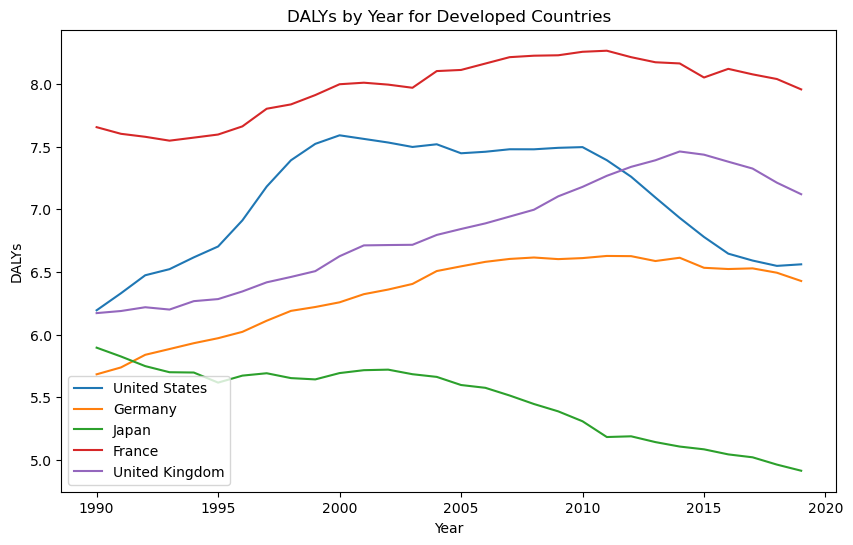

In [54]:
plt.figure(figsize=(10, 6)) 
for i in developed_countries:
    df = developed_dat[developed_dat['Entity'] == i]
    plt.plot(df['Year'], df['DALYs'], label=i)
plt.legend()
plt.title('DALYs by Year for Developed Countries')
plt.xlabel('Year')
plt.ylabel('DALYs')
plt.show()

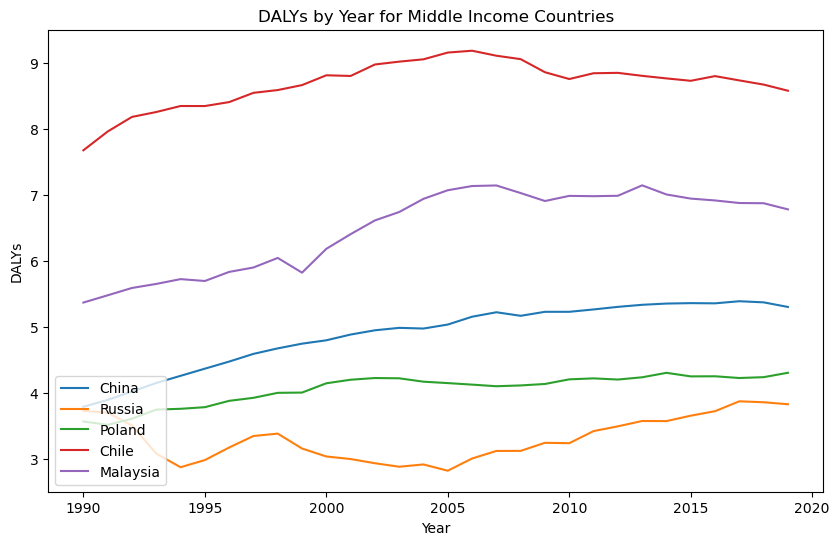

In [74]:
plt.figure(figsize=(10, 6)) 
for i in middle_countries:
    df = middle_dat[middle_dat['Entity'] == i]
    plt.plot(df['Year'], df['DALYs'], label=i)
plt.legend(loc='lower left')
plt.title('DALYs by Year for Middle Income Countries')
plt.xlabel('Year')
plt.ylabel('DALYs')
plt.show()

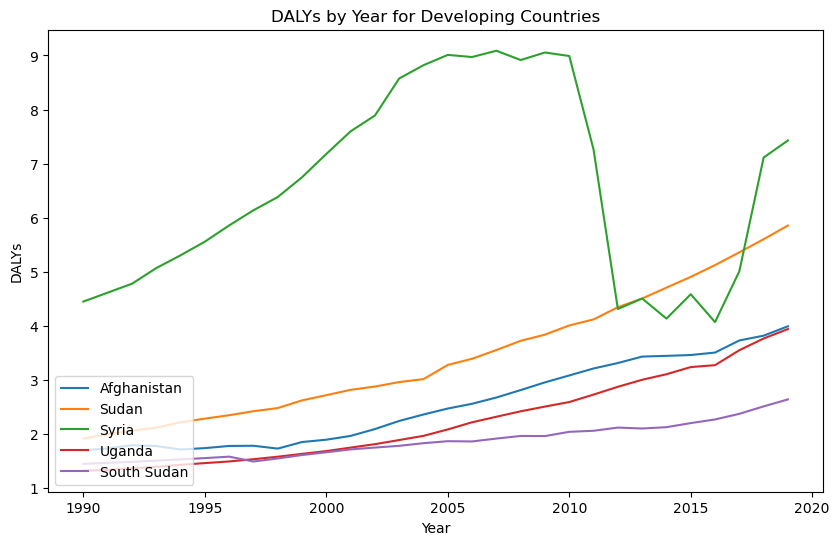

In [75]:
plt.figure(figsize=(10, 6)) 
for i in developing_countries:
    df = developing_dat[developing_dat['Entity'] == i]
    plt.plot(df['Year'], df['DALYs'], label=i)
plt.legend(loc='lower left')
plt.title('DALYs by Year for Developing Countries')
plt.xlabel('Year')
plt.ylabel('DALYs')
plt.show()

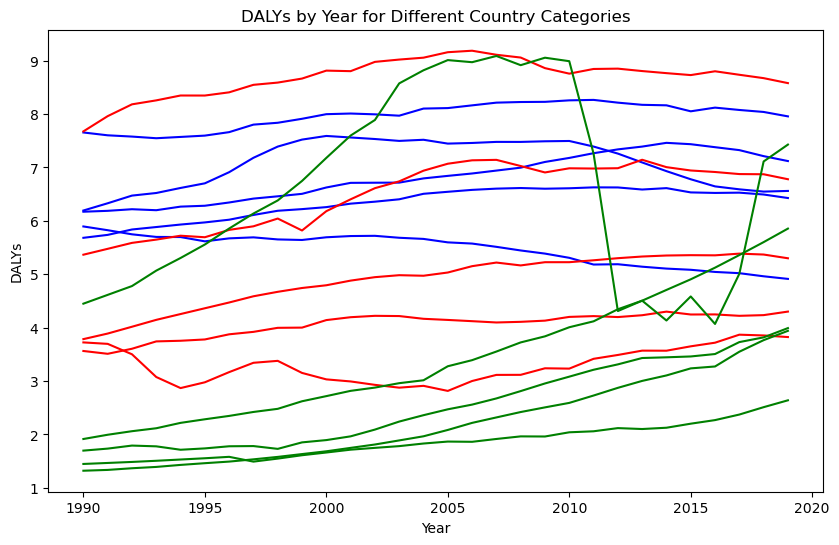

In [81]:
plt.figure(figsize=(10, 6))

for i in developed_countries:
    df = developed_dat[developed_dat['Entity'] == i]
    plt.plot(df['Year'], df['DALYs'], label=f"{i} (Developed)", color='blue')

for i in middle_countries:
    df = middle_dat[middle_dat['Entity'] == i]
    plt.plot(df['Year'], df['DALYs'], label=f"{i} (Middle)", color='red')

for i in developing_countries:
    df = developing_dat[developing_dat['Entity'] == i]
    plt.plot(df['Year'], df['DALYs'], label=f"{i} (Developing)", color='green')


plt.title('DALYs by Year for Different Country Categories')
plt.xlabel('Year')
plt.ylabel('DALYs')
plt.show()


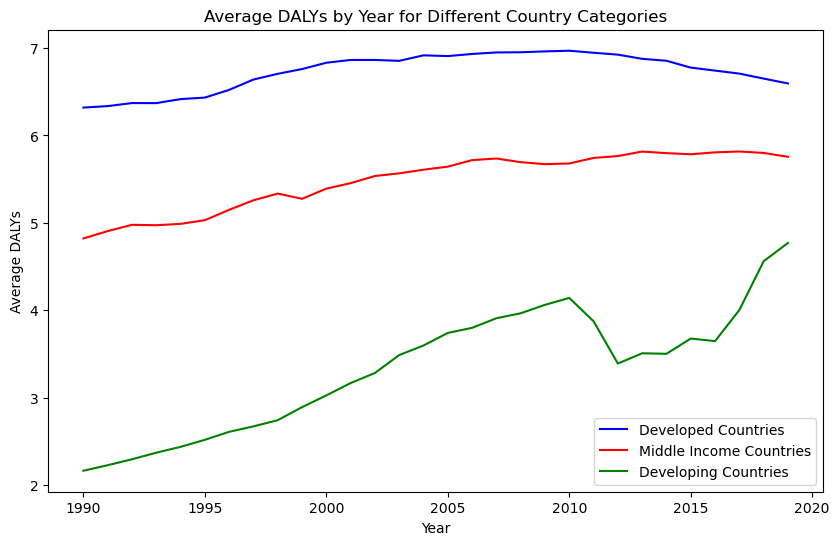

In [82]:
avg_developed = developed_dat[developed_dat['Entity'].isin(developed_countries)].groupby('Year')['DALYs'].mean()
avg_middle = middle_dat[middle_dat['Entity'].isin(middle_countries)].groupby('Year')['DALYs'].mean()
avg_developing = developing_dat[developing_dat['Entity'].isin(developing_countries)].groupby('Year')['DALYs'].mean()

plt.figure(figsize=(10, 6))
plt.plot(avg_developed.index, avg_developed, label='Developed Countries', color='blue')
plt.plot(avg_middle.index, avg_middle, label='Middle Income Countries', color='red')
plt.plot(avg_developing.index, avg_developing, label='Developing Countries', color='green')

plt.legend()
plt.title('Average DALYs by Year for Different Country Categories')
plt.xlabel('Year')
plt.ylabel('Average DALYs')
plt.show()
